In [4]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import string
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn import preprocessing, utils, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [70]:

# Завантаження + підготовка числових ознак 
df = pd.read_csv('googleplaystore.csv')

# Перетворюємо всі колонки в числові
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Size — прибираємо 'M', 'k', 'Varies with device'
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('k', 'e3')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Installs — прибираємо '+' і ','
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Price — прибираємо '$'
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Заповнюємо пропуски медіаною (як у diabetes)
df_numeric = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].fillna(df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].median())

# Це наш X — тільки числові ознаки
X = df_numeric
y = df['Category']  # це наш "Outcome"

print("X готово:", X.shape)
X.head()

X готово: (10841, 5)


,Rating,Reviews,Size,Installs,Price
0,4.1,159.0,19000000.0,10000.0,0.0
1,3.9,967.0,14000000.0,500000.0,0.0
2,4.7,87510.0,8700000.0,5000000.0,0.0
3,4.5,215644.0,25000000.0,50000000.0,0.0
4,4.3,967.0,2800000.0,100000.0,0.0


In [3]:
############## TASK 1 Зниження розмірності і візуалізація даних ###################

In [ ]:
# ==================================================================
# 2. PCA — зниження до 2 компонент (точно як у прикладі)
# ==================================================================
from sklearn.decomposition import PCA
X = df[['Rating', 'Size', 'Reviews']].fillna(df[['Rating', 'Size', 'Reviews']].median())
y = df['Installs']
principal_components = PCA(n_components=2)
X_pca = principal_components.fit_transform(X)

X_pca = pd.DataFrame({
    'principal_component_1': X_pca[:,0], 
    'principal_component_2': X_pca[:,1]
})

pca_dataset = pd.concat([X_pca, y], axis = 1)
pca_dataset.describe()

,principal_component_1,principal_component_2,Installs
count,1.084100e+04,1.084100e+04,1.084000e+04
mean,-2.111261e-09,-4.398461e-11,1.546434e+07
std,2.097823e+07,2.911431e+06,8.502936e+07
min,-2.018004e+07,-1.625585e+06,0.000000e+00
25%,-1.428918e+07,-4.545824e+05,1.000000e+03
50%,-7.188663e+06,-2.759452e+05,1.000000e+05
75%,5.808612e+06,-1.852081e+05,5.000000e+06
max,7.989043e+07,7.781203e+07,1.000000e+09


<Axes: xlabel='principal_component_1', ylabel='principal_component_2'>

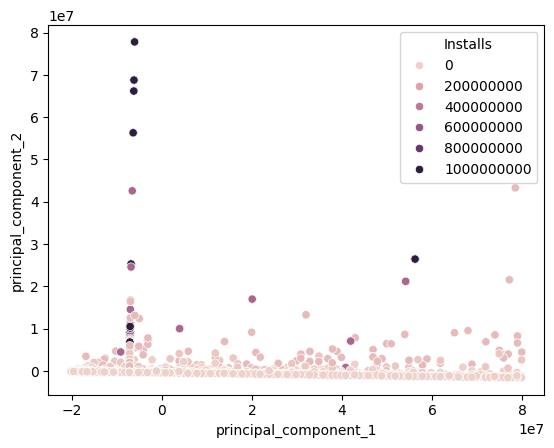

In [53]:
sns.scatterplot(data=pca_dataset, x='principal_component_1', y='principal_component_2', hue='Installs') 

In [54]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X)
X_tsne=pd.DataFrame({'tsne_1': X_tsne[:,0], 'tsne_2': X_tsne[:,1]})
tsne_dataset = pd.concat([X_tsne, y], axis = 1)
tsne_dataset.describe()

,tsne_1,tsne_2,Installs
count,10841.000000,10841.000000,1.084000e+04
mean,-0.470443,-0.647707,1.546434e+07
std,50.441181,47.250839,8.502936e+07
min,-105.615128,-94.375229,0.000000e+00
25%,-37.589615,-36.436401,1.000000e+03
50%,-0.249265,-0.297673,1.000000e+05
75%,37.050087,34.782707,5.000000e+06
max,103.272392,99.262001,1.000000e+09


<Axes: xlabel='tsne_1', ylabel='tsne_2'>

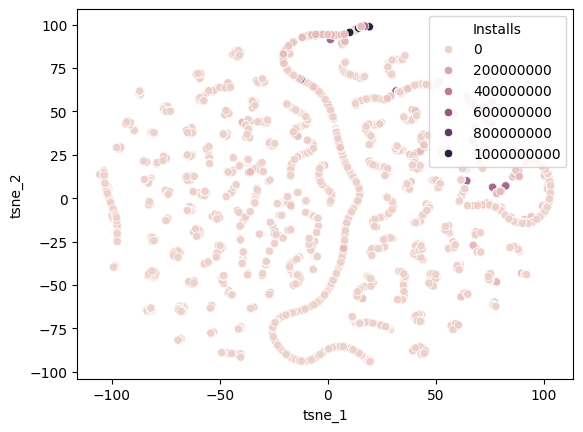

In [55]:
sns.scatterplot(data=tsne_dataset, x='tsne_1', y='tsne_2', hue='Installs')

In [8]:
############## TASK 2 Кластерний аналіз ###################

In [9]:
############## 2.1 k-means algorithm #################

In [40]:
n_colors = [64, 32, 16, 8]
img = Image.open('man.united.jpg')
# Convert to floats instead of the default 8 bits integer coding.
img = np.array(img, dtype=np.float64) / 255

#transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans_arr = []
labels_arr = []
for i in range(len(n_colors)):
    kmeans_arr.append(KMeans(n_clusters=n_colors[i], random_state=0).fit(image_array_sample))
    labels_arr.append(kmeans_arr[i].predict(image_array))

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1);

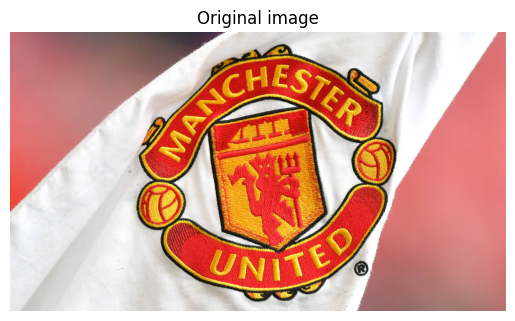

In [41]:
plt.figure(i)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(img)

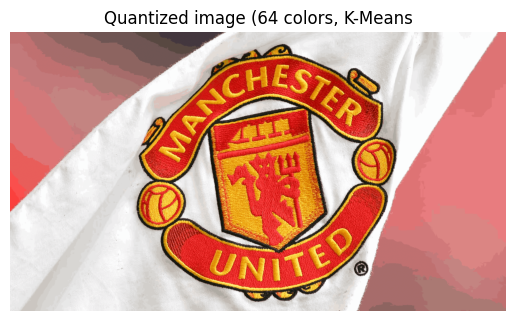

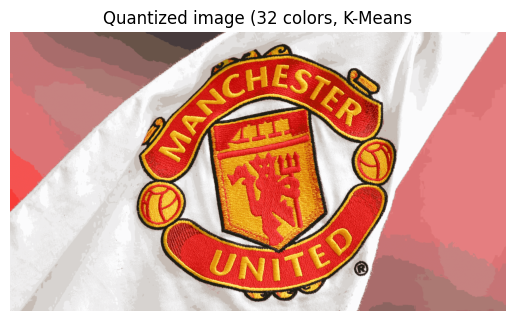

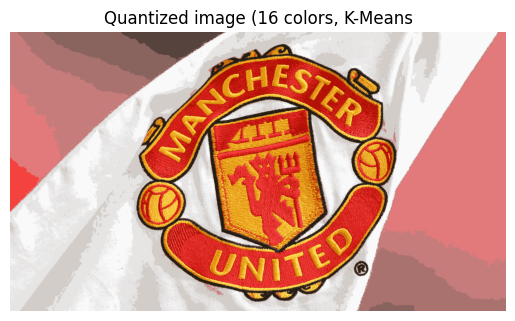

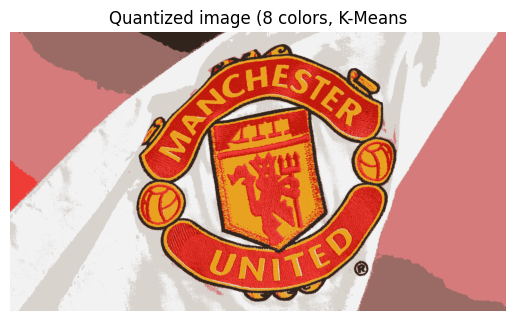

In [42]:
for i in range(len(n_colors)):
    plt.figure(i+1)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors[i]} colors, K-Means")
    plt.imshow(recreate_image(kmeans_arr[i].cluster_centers_, labels_arr[i], w, h))

In [13]:
############## TASK 3 Обробка та класифікація текстових даних ###################

In [ ]:

dataset = pd.read_csv('spam.csv', encoding='latin-1')

dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]

dataset = dataset.rename(columns={'v1': 'label', 'v2': 'text'})

print("Форма датасету:", dataset.shape)
print("Колонки:", dataset.columns.tolist())
dataset.head()

Форма датасету: (5572, 2)
Колонки: ['label', 'text']


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

def fast_cleaning(text):
    text = text.lower()
    text = text.translate(translator)
    words = text.split()
    return ' '.join([w for w in words if w not in stop_words])
dataset['text'] = dataset['text'].apply(fast_cleaning)
dataset.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [17]:
##################### VISUALISATION ################

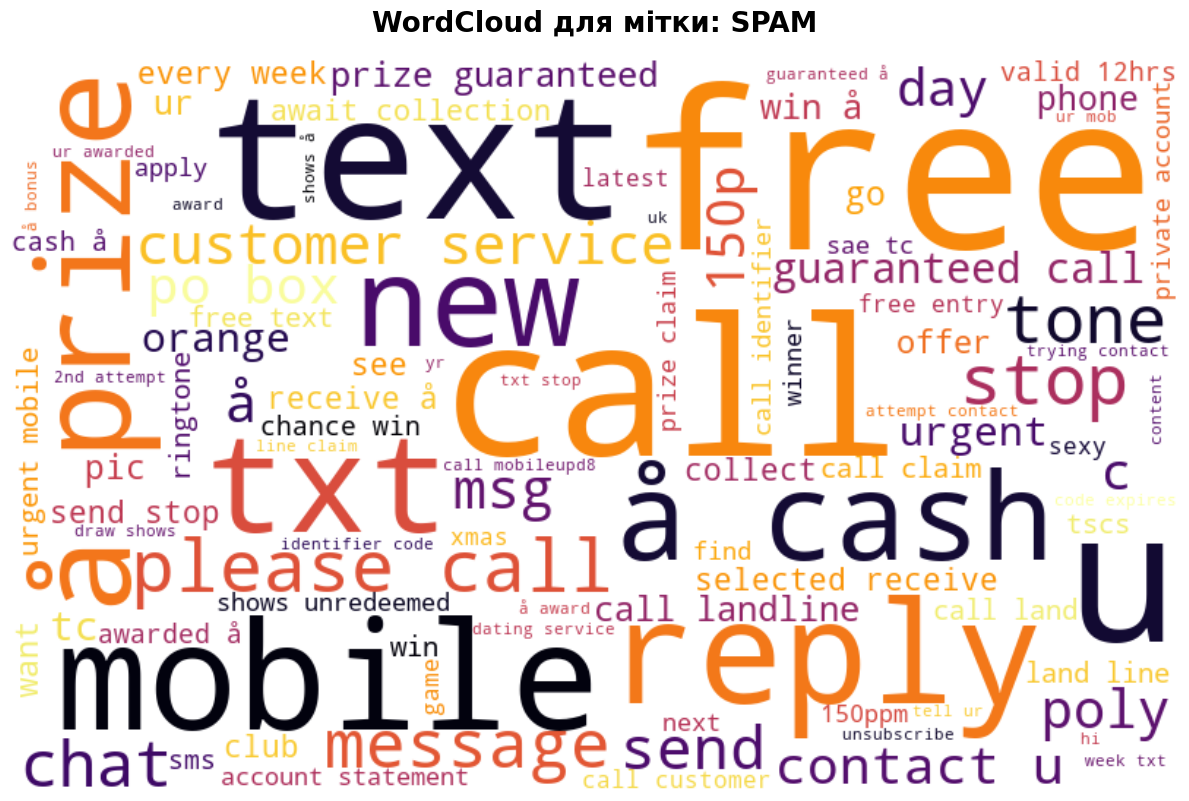

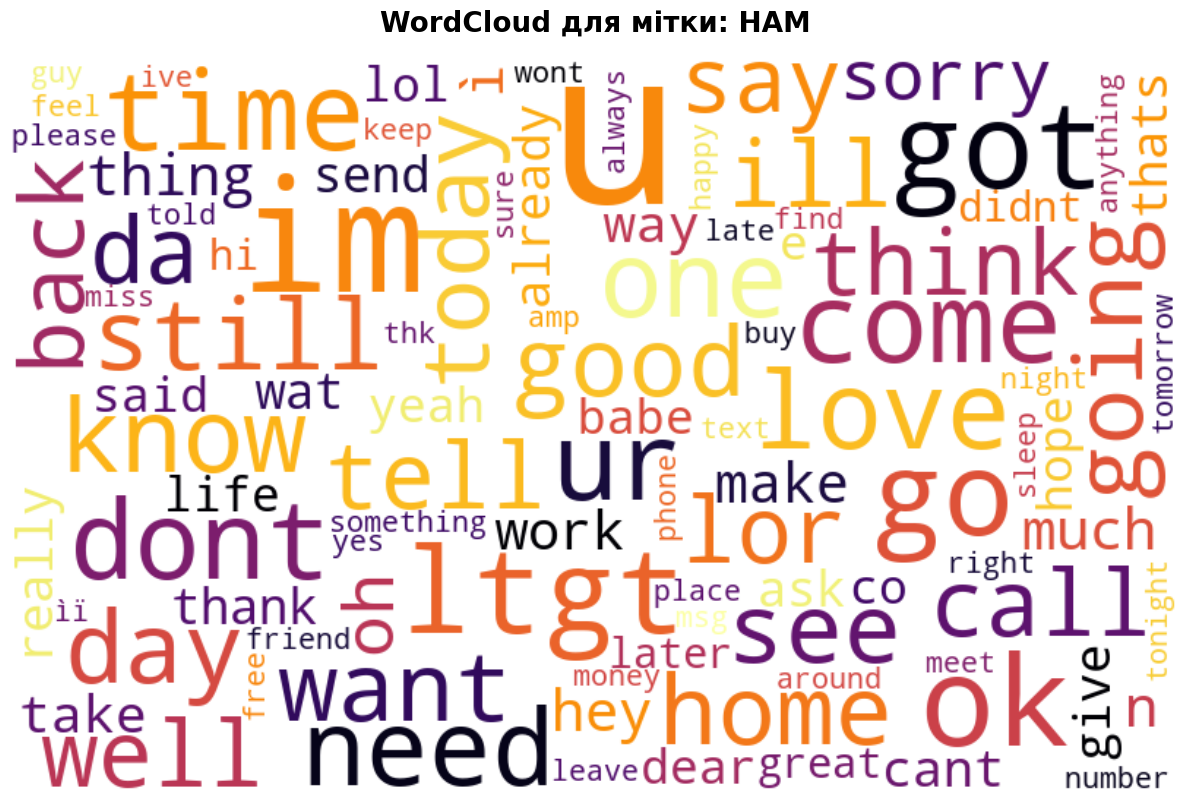

In [64]:

def wordcloud_visualisation(label):
    text = ' '.join(dataset[dataset['label'] == label]['text'])

    wc = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        width=800,
        height=500,
        max_words=100,
        min_font_size=10,
        max_font_size=150,
        colormap='inferno',
        contour_width=1,
        contour_color='gray',
        random_state=42
    ).generate(text)

    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud для мітки: {label.upper()}", 
              fontsize=20, pad=20, fontweight='bold')
    plt.tight_layout()
    plt.show()

wordcloud_visualisation('spam')
wordcloud_visualisation('ham')

In [21]:
#################### VECTORIZING #########################

In [65]:
X = dataset['text']
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
tfidfv = TfidfVectorizer()
X_train_vectorised = tfidfv.fit_transform(X_train)
X_test_vectorised = tfidfv.transform(X_test)

In [23]:
################### CLASSIFICATION ######################

Найкраща точність: 0.9623 при K = 1


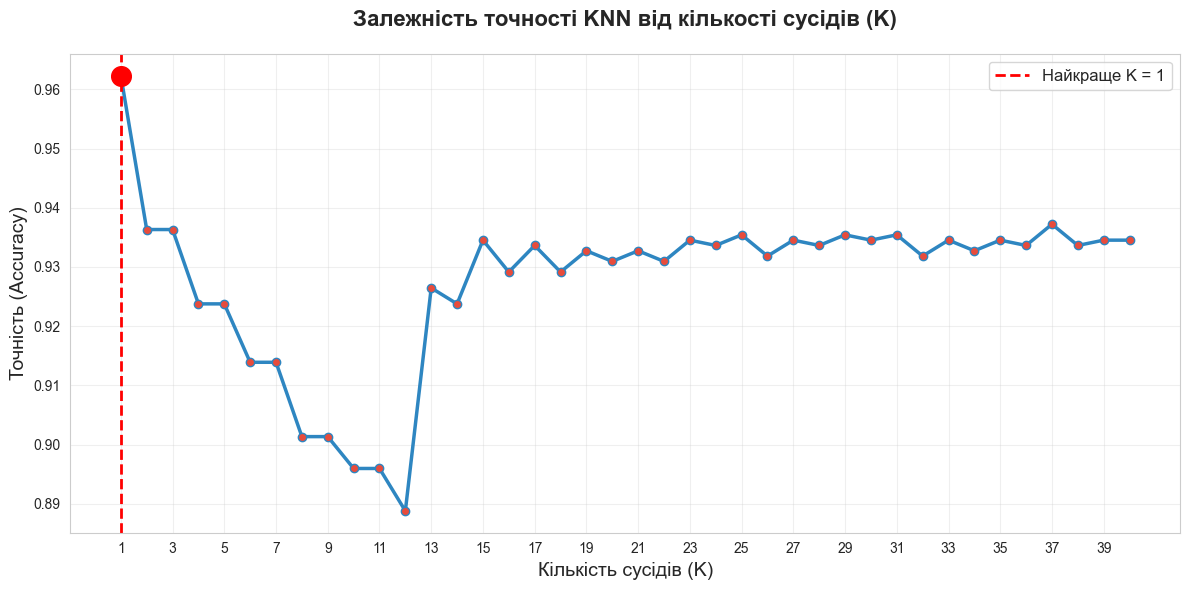

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_list = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_vectorised, y_train)
    y_pred = knn.predict(X_test_vectorised)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

# Знаходимо найкраще K
best_k = accuracy_list.index(max(accuracy_list)) + 1
best_accuracy = max(accuracy_list)

print(f"Найкраща точність: {best_accuracy:.4f} при K = {best_k}")

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(range(1, 41), accuracy_list, 
         marker='o', linewidth=2.5, markersize=6, color='#2E86C1', markerfacecolor='#E74C3C')

#найкраще K на графіку
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, label=f'Найкраще K = {best_k}')
plt.scatter(best_k, best_accuracy, color='red', s=200, zorder=5)

plt.title('Залежність точності KNN від кількості сусідів (K)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Кількість сусідів (K)', fontsize=14)
plt.ylabel('Точність (Accuracy)', fontsize=14)
plt.xticks(range(1, 41, 2))
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       982
        spam       1.00      0.68      0.81       133

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.90      1115
weighted avg       0.96      0.96      0.96      1115



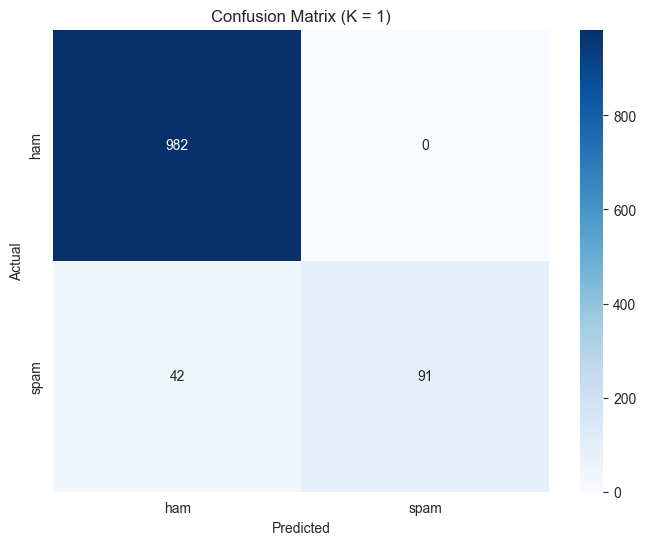

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_vectorised, y_train)
y_pred = knn.predict(X_test_vectorised)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['ham', 'spam'],
            yticklabels=['ham', 'spam'])
plt.title(f'Confusion Matrix (K = {best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()